In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

In [5]:
data = pd.read_csv('../data/microchip_tests.txt', header=None, names=('test1', 'test2', 'released'))
data.head()

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
test1       118 non-null float64
test2       118 non-null float64
released    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


In [8]:
X = data.ix[:, :2].values
y = data.ix[:, 2].values

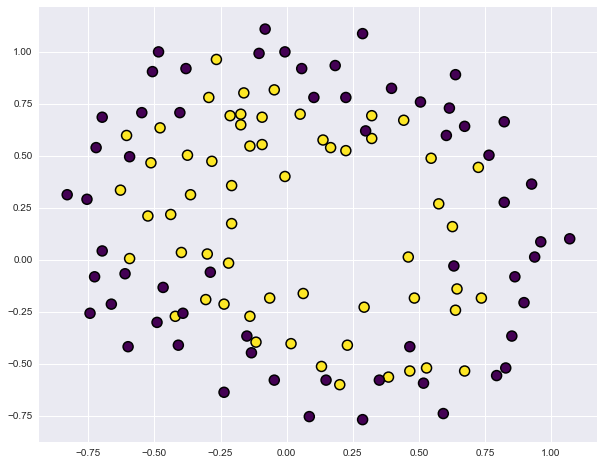

In [34]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='black', s=100, linewidths=1.5)

In [71]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:,0].min()-.1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min()-.1, X[:,1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step), 
                         np.arange(y_min, y_max, grid_step))
    
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    

## Обучение регрессии

In [68]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

In [69]:
C = 1e-2
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=17, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.627

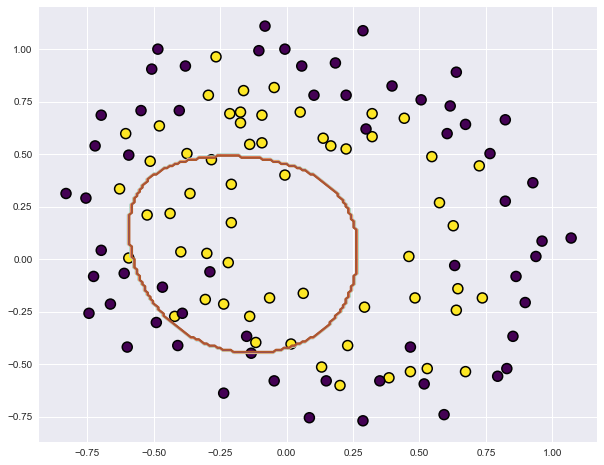

In [75]:
plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='black', s=100, linewidths=1.5)
round(logit.score(X_poly, y), 3)

0.83099999999999996

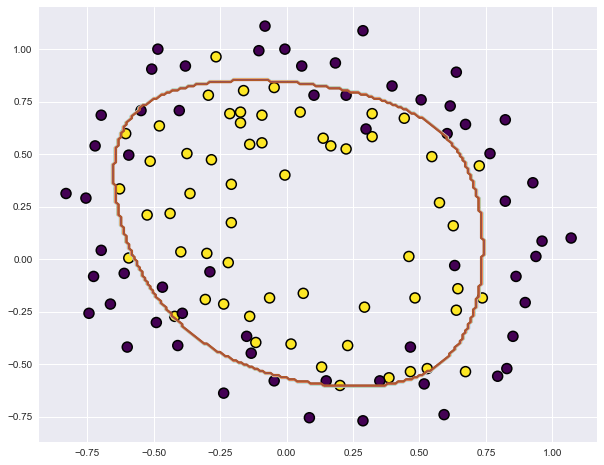

In [77]:
C = 1
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)
plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='black', s=100, linewidths=1.5)
round(logit.score(X_poly, y), 3)

0.873

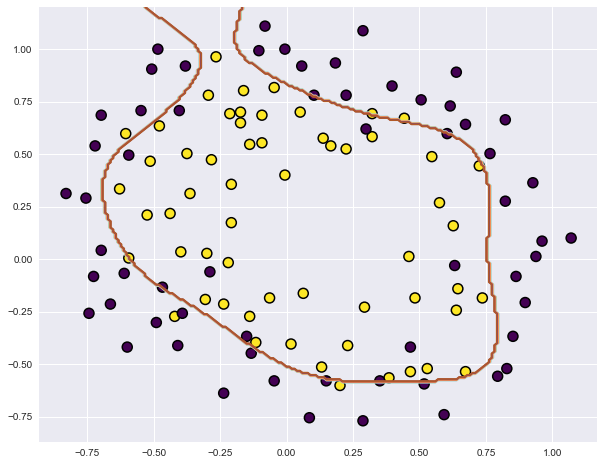

In [78]:
C = 1e4
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)
plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='black', s=100, linewidths=1.5)
round(logit.score(X_poly, y), 3)